In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

from tensorflow.keras import optimizers # lr 조정할때 쓰임
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import pandas as pd

np.random.seed(0)
tf.random.set_seed(0)

df = pd.read_csv('data-02-stock_daily.csv', header=1)
df

,Open,High,Low,Volume,Close
0,828.659973,833.450012,828.349976,1247700,831.659973
1,823.020020,828.070007,821.655029,1597800,828.070007
2,819.929993,824.400024,818.979980,1281700,824.159973
3,819.359985,823.000000,818.469971,1304000,818.979980
4,819.000000,823.000000,816.000000,1053600,820.450012
...,...,...,...,...,...
727,599.992707,604.832763,562.192568,147100,567.002574
728,558.712504,568.452595,558.712504,7900,567.162558
729,566.892592,567.002574,556.932537,10800,556.972503
730,561.202549,566.432590,558.672539,41200,559.992565


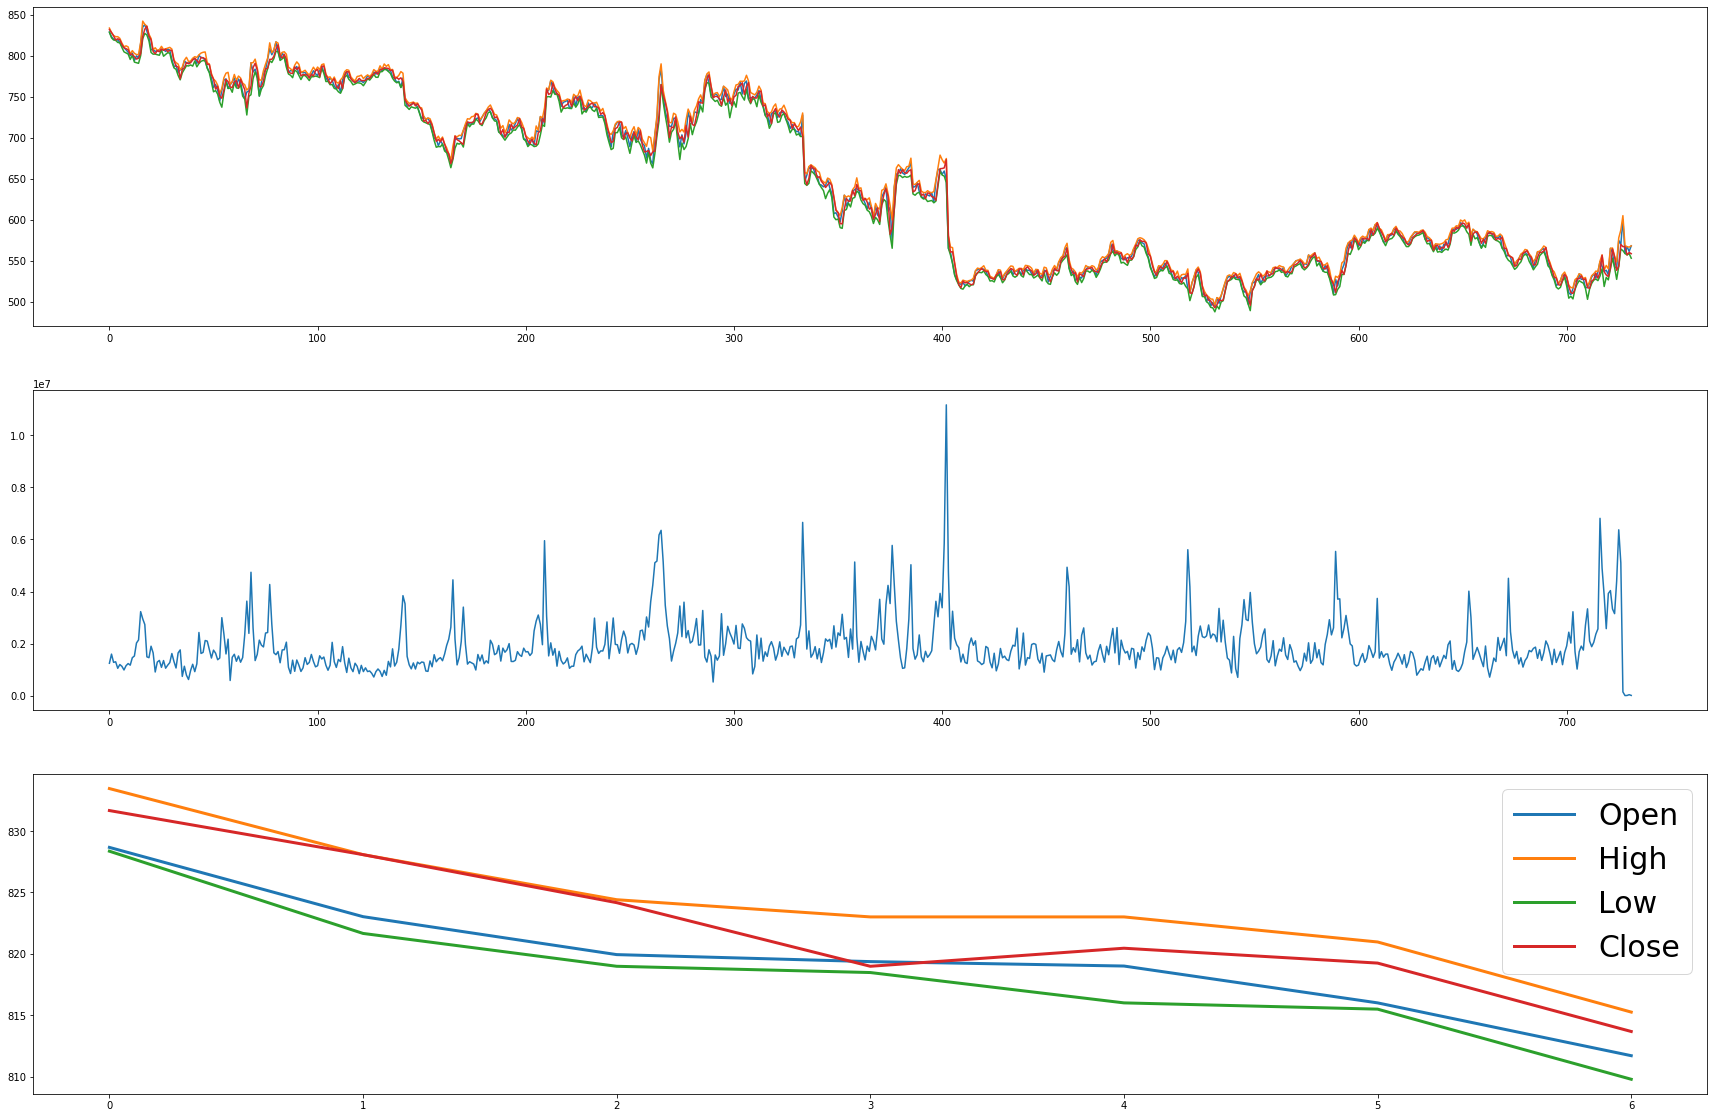

In [10]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(df['Open'])
ax1.plot(df['High'])
ax1.plot(df['Low'])
ax1.plot(df['Close'])

ax2.plot(df['Volume'])

ax3.plot(df['Open'][0:7], linewidth=3.0, label="Open")
ax3.plot(df['High'][0:7], linewidth=3.0, label='High')
ax3.plot(df['Low'][0:7], linewidth=3.0, label='Low')
ax3.plot(df['Close'][0:7], linewidth=3.0, label='Close')

ax3.legend(prop={'size' : 30})

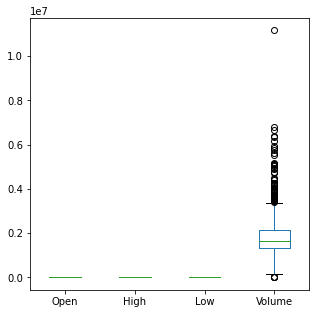

In [15]:
df = df.sample(frac=1)
#dataset = df.values 
#x = dataset[:,:4].astype(float)
#y = dataset[:,4].astype(float)
x = df[["Open","High","Low","Volume"]]
y = pd.DataFrame(df["Close"])

x.plot.box(figsize=(5,5))
plt.show()

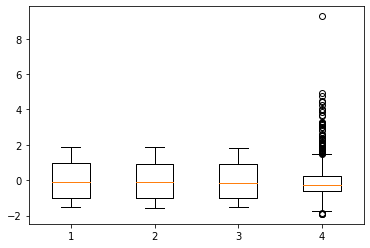


Epoch 00001: loss improved from inf to 0.21783, saving model to ./model\01-0.0080.hdf5

Epoch 00002: loss improved from 0.21783 to 0.00645, saving model to ./model\02-0.0048.hdf5

Epoch 00003: loss improved from 0.00645 to 0.00308, saving model to ./model\03-0.0033.hdf5

Epoch 00004: loss did not improve from 0.00308

Epoch 00005: loss did not improve from 0.00308

Epoch 00006: loss did not improve from 0.00308

Epoch 00007: loss improved from 0.00308 to 0.00303, saving model to ./model\07-0.0019.hdf5

Epoch 00008: loss did not improve from 0.00303

Epoch 00009: loss did not improve from 0.00303

Epoch 00010: loss did not improve from 0.00303

Epoch 00011: loss improved from 0.00303 to 0.00287, saving model to ./model\11-0.0023.hdf5

Epoch 00012: loss did not improve from 0.00287

Epoch 00013: loss did not improve from 0.00287

Epoch 00014: loss did not improve from 0.00287

Epoch 00015: loss improved from 0.00287 to 0.00239, saving model to ./model\15-0.0054.hdf5

Epoch 00016: loss d

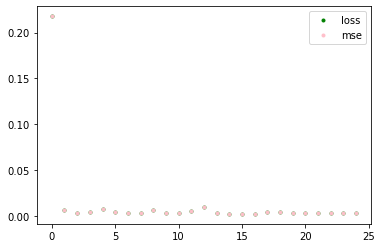

7/7 [==============================] - 0s 570us/step - loss: 0.0022 - mse: 0.0022
Evaluate :0.002183366810448616 


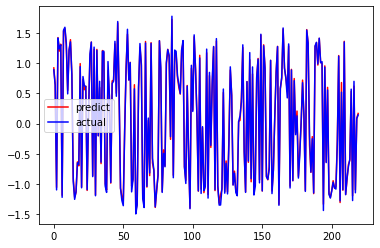

In [22]:
x_ss = StandardScaler().fit_transform(x)
y_ss = StandardScaler().fit_transform(y)
plt.boxplot(x_ss)
plt.show()

x_train=x_ss[220:,:]
x_test=x_ss[:220,:]
y_train=y_ss[220:,:]
y_test=y_ss[:220,:]

x_train, x_test, y_train, y_test = train_test_split(x_ss, y_ss, test_size = 0.3, random_state=0)

model = Sequential()
model.add(Dense(1000, input_dim=4, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# 모델 학습과정 설정
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.01), metrics=['mse'])

early_stopping_callback = EarlyStopping(monitor='mse', patience=10)

#모델저장조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='loss', verbose=1,save_best_only = True)

history = model.fit(x_train, y_train, validation_split=0.33, epochs=100, batch_size=10, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

#테스트셋으로 실험 오차값 저장
y_loss = history.history['loss']
y_mse = history.history['mse']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, "o", c="green", markersize=3, label='loss')
plt.plot(x_len, y_mse, "o", c="pink", markersize=3, label='mse')
plt.legend()
plt.show()

res = model.evaluate(x_test, y_test, batch_size=32)

y_predict = model.predict(x_test)

plt.figure()
plt.plot(y_predict, c='red', label='predict')
plt.plot(y_test, c='blue', label='actual')
plt.legend(prop={'size' : 10})

print("Evaluate :{} ".format(np.average((y_predict - y_test)**2)))